In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector

In [4]:
con=mysql.connector.connect(
host='localhost',
user='root',
password='0203482898',
database='student',
auth_plugin='mysql_native_password')

In [5]:
data=pd.read_sql_query('select * from studmarks',con,parse_dates=['DOB'])
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [6]:
data.shape

(10, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null datetime64[ns]
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 1008.0+ bytes


In [8]:
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [9]:
data.Gender.value_counts()

F    5
M    5
Name: Gender, dtype: int64

Summery Statistics

In [10]:
data.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [11]:
data['Total']=data['Maths']+data['Physics']+data['Chemistry']+data['English']+data['Biology']+data['Economics']+data['History']+data['Civics']
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52,556
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61,496
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87,517
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89,587
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77,566


In [12]:
#If each subject contains 100 marks then the total mark is 800.
data['Percentage']=(data['Total']/800)*100
#Here i think Birth Year will contribute more to the model than DOB
data['Birth_Year']=data['DOB'].dt.year
data.drop(['DOB'],axis=1,inplace=True)
data

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage,Birth_Year
0,John,M,55,45,56,87,21,52,89,65,470,58.750,1988
1,Suresh,M,75,96,78,64,90,61,58,2,524,65.500,1987
2,Ramesh,M,25,54,89,76,95,87,56,74,556,69.500,1989
3,Jessica,F,78,96,86,63,54,89,75,45,586,73.250,1990
4,Jennifer,F,58,96,78,46,96,77,83,53,587,73.375,1989
5,Annu,F,45,87,52,89,55,89,87,52,556,69.500,1988
6,pooja,F,55,64,61,58,75,58,64,61,496,62.000,1987
7,Ritesh,M,54,76,87,56,25,56,76,87,517,64.625,1989
8,Farha,F,55,63,89,75,78,75,63,89,587,73.375,1990
9,Mukesh,M,96,46,77,83,58,83,46,77,566,70.750,1989


Data Visualization

AxesSubplot(0.125,0.125;0.62x0.755)


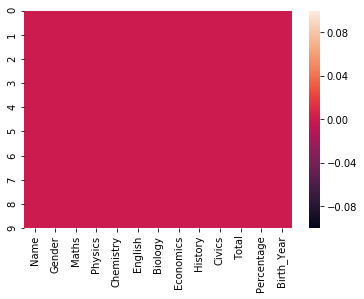

In [13]:
null_val=data.isnull()
print(sns.heatmap(null_val))

In [14]:
#The dataset has no null values

Checking the correlation

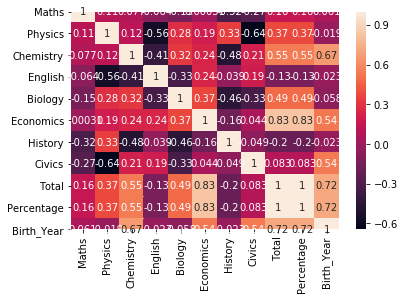

In [15]:
cor=data.corr()
sns.heatmap(cor,annot=True)

Checking for Outliers

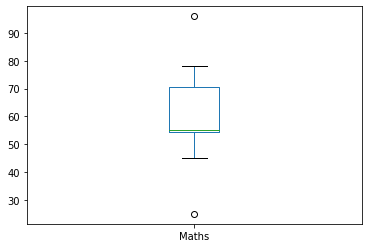

In [16]:
data.Maths.plot.box()

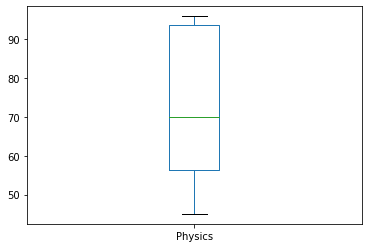

In [17]:
data.Physics.plot.box()

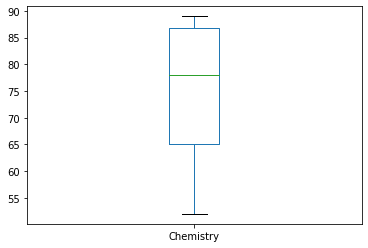

In [18]:
data.Chemistry.plot.box()

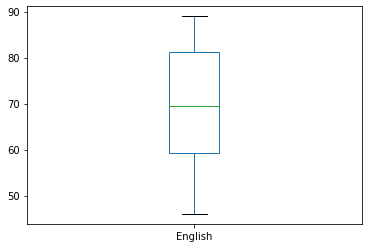

In [19]:
data.English.plot.box()

Maths            AxesSubplot(0.125,0.536818;0.110714x0.343182)
Physics       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Chemistry     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
English       AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Biology       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Economics     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
History             AxesSubplot(0.125,0.125;0.110714x0.343182)
Civics           AxesSubplot(0.257857,0.125;0.110714x0.343182)
Total            AxesSubplot(0.390714,0.125;0.110714x0.343182)
Percentage       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Birth_Year       AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

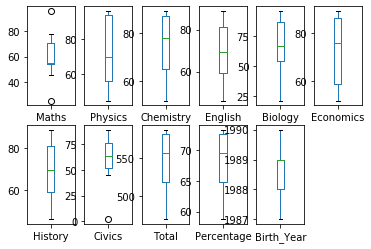

In [20]:
data.plot(kind='box',subplots=True,layout=(2,6))

In [21]:
#There is no Outliers within the dataset

In [22]:
data.skew()

Maths         0.246964
Physics      -0.045336
Chemistry    -0.746462
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
Civics       -1.332448
Total        -0.642123
Percentage   -0.642123
Birth_Year   -0.322013
dtype: float64

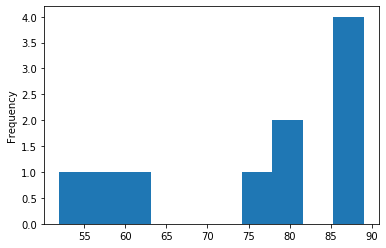

In [23]:
data.Chemistry.plot.hist()

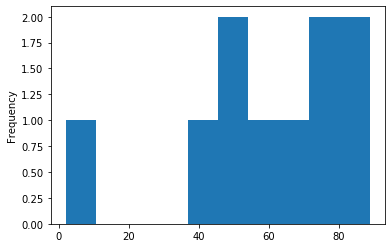

In [24]:
data.Civics.plot.hist()

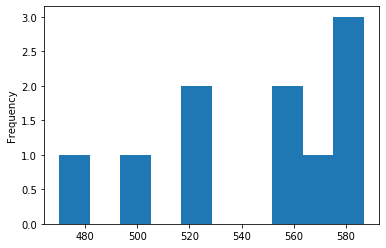

In [25]:
data.Total.plot.hist()

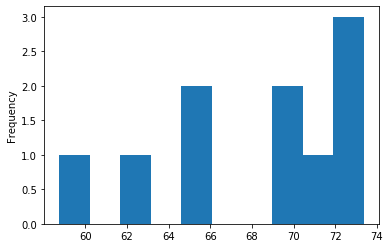

In [26]:
data.Percentage.plot.hist()

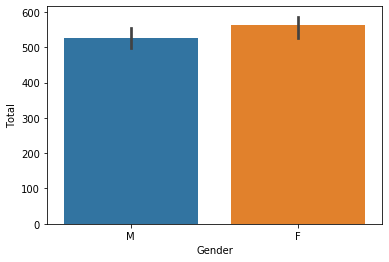

In [27]:
sns.barplot(x='Gender',y='Total',data=data)
plt.show()

In [28]:
#Females are scoring well than the Males

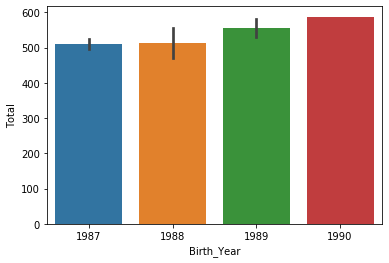

In [29]:
sns.barplot(x='Birth_Year',y='Total',data=data)
plt.show()

In [30]:
#students with lesser age scoreing well than the olders

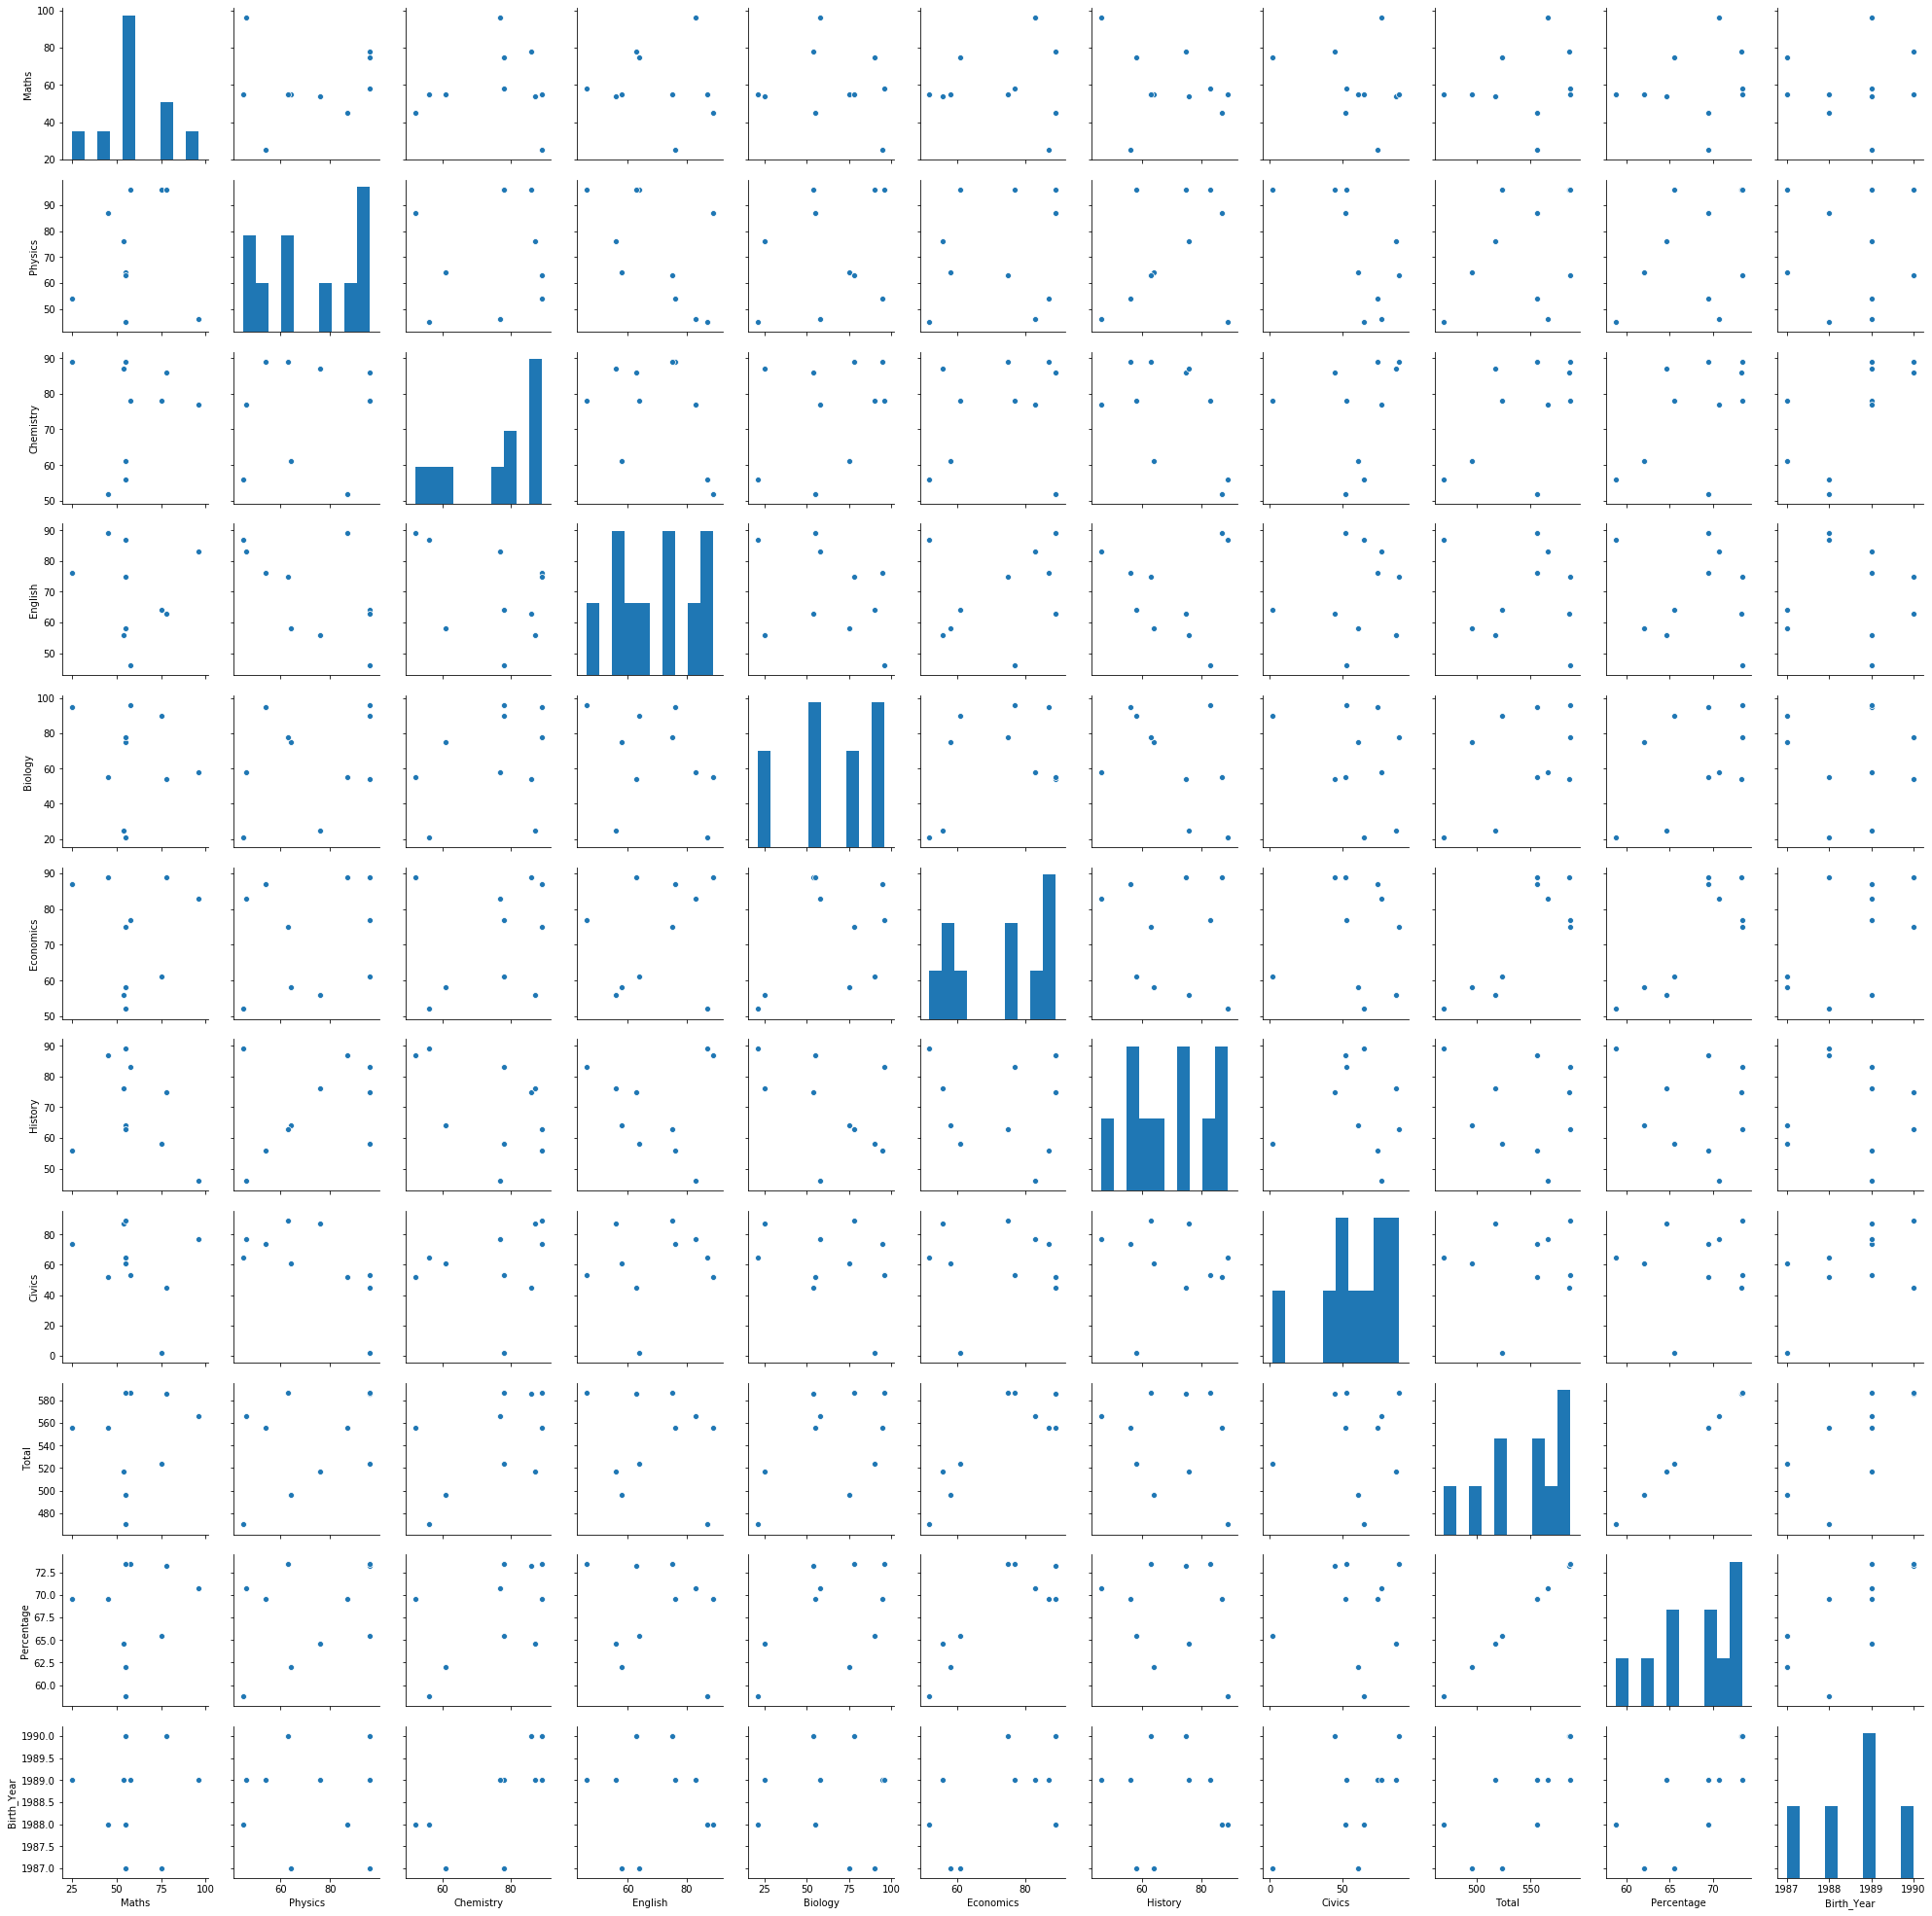

In [31]:
sns.pairplot(data)

In [35]:
 #Sir/Madam, The bellow codes are just for proff:

In [32]:
from scipy.stats import boxcox
data['Chemistry']=boxcox(data['Chemistry'],0)
data.skew()

Maths         0.246964
Physics      -0.045336
Chemistry    -0.896361
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
Civics       -1.332448
Total        -0.642123
Percentage   -0.642123
Birth_Year   -0.322013
dtype: float64

In [33]:
data['Civics']=np.log(data['Civics'])
data.Civics.skew()

-2.9274204671494903

In [34]:
data['Percentage']=np.sqrt(data['Percentage'])
data.Percentage.skew()

-0.6915404174470664